In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
from matplotlib import colors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, norm, expon, gamma, skewnorm
import os.path
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D

import IPython

from configMaker import get_model_name

dataset_type = 'cifar10'
#dataset_type = 'mnist_small'
model_type = 'all_cnn_c_hidden'
out = '../output-week4'
#out = '../output-week3'
nametag = 'find-distribs-deeper'
#nametag = 'find_distribs'

if dataset_type == 'mnist_small':
    seeds = range(300)
    num_steps = 300000
    num_train_points = 5500
    num_units = 2
elif dataset_type == 'mnist':
    seeds = range(8)
    num_steps = 1000000
    num_train_points = 55000
    num_units = 3
elif dataset_type == 'cifar10_small':
    seeds = range(1)
    num_steps = 300000
    num_train_points = 4900
    num_units = 2
elif dataset_type == 'cifar10':
    seeds = range(13)
    num_steps = 1000000
    num_train_points = 49000
    num_units = 3
num_test_points = 10000
num_seeds = len(seeds)

allowed_fits = [None, 'normal']

test_idx=6558

fontsize=16
sns.set(color_codes=True)
sns.set_style('white')

def ceil_divide(numer,denom):
    return (numer-1)//denom+1

In [2]:
losses_over_time = [None] * num_seeds # every 1k steps
losses_fine_over_time = [None] * num_seeds # first 100 steps
indiv_train_losses = [None] * num_seeds # indiv train losses after training
indiv_test_losses = [None] * num_seeds # indiv test losses after training
indiv_pred_infls = [None] * num_seeds # indiv pred infls after trianing

for i, seed in enumerate(seeds):
    model_name = get_model_name(nametag=nametag, dataset_type=dataset_type, model_type=model_type, seed=seed, num_units=num_units, num_steps=num_steps)
    lossespathname = '../{}/{}_test_losses_over_time.npz'.format(out, model_name)
    traintestpredpathname = '../{}/{}_train_test_losses_pred_infl.npz'.format(out,model_name)
    #traintestpredpathname = '../{}/{}_train_test_losses_pred_infl_on_8.npz'.format(out,model_name)

    f1 = np.load(lossespathname)
    losses_over_time[i] = f1['losses']
    losses_fine_over_time[i] = f1['losses_fine']
    f2 = np.load(traintestpredpathname)
    indiv_train_losses[i] = f2['train_losses']
    indiv_test_losses[i] = f2['test_losses']
    indiv_pred_infls[i] = f2['pred_infl']
    
losses_over_time = np.array(losses_over_time)
losses_fine_over_time = np.array(losses_fine_over_time)
indiv_train_losses = np.array(indiv_train_losses)
indiv_test_losses = np.array(indiv_test_losses)
indiv_pred_infls = np.array(indiv_pred_infls)

In [3]:
train_means = [None] * num_train_points
train_stddevs = [None] * num_train_points
test_means = [None] * num_test_points
test_stddevs = [None] * num_test_points
infl_means = [None] * num_train_points
infl_stddevs = [None] * num_train_points

"""train_means_gamma = [None] * num_train_points
train_stddevs_gamma = [None] * num_train_points
test_means_gamma = [None] * num_test_points
test_stddevs_gamma = [None] * num_test_points

train_means_skew = [None] * num_train_points
train_stddevs_skew = [None] * num_train_points
test_means_skew = [None] * num_test_points
test_stddevs_skew = [None] * num_test_points
infl_means_skew = [None] * num_test_points
infl_stddevs_skew = [None] * num_test_points"""

for i in range(num_train_points):
    """a, loc, scale = gamma.fit(indiv_train_losses[:,i])
    train_means_gamma[i] = gamma.mean(a, loc, scale)
    train_stddevs_gamma[i] = gamma.std(a, loc, scale)
    a, loc, scale = skewnorm.fit(indiv_train_losses[:,i])
    train_means_skew[i] = skewnorm.mean(a, loc, scale)
    train_stddevs_skew[i] = skewnorm.std(a, loc, scale)
    a, loc, scale = skewnorm.fit(indiv_pred_infls[:,i])
    infl_means_skew[i] = skewnorm.mean(a, loc, scale)
    infl_stddevs_skew[i] = skewnorm.std(a, loc, scale)"""
    train_means[i], train_stddevs[i] = norm.fit(indiv_train_losses[:,i])
    infl_means[i], infl_stddevs[i] = norm.fit(indiv_pred_infls[:,i])
    """if train_means_gamma[i] > 8:
        print('Train pt {}'.format(i))
    if train_means_skew[i] > 8:
        print('Train pt {}'.format(i))"""
    if i % (num_train_points//11) == 0:
        print(i,num_train_points)
for i in range(num_test_points):
    """a, loc, scale = gamma.fit(indiv_test_losses[:,i])
    test_means_gamma[i] = gamma.mean(a, loc, scale)
    test_stddevs_gamma[i] = gamma.std(a, loc, scale)
    a, loc, scale = skewnorm.fit(indiv_test_losses[:,i])
    test_means_skew[i] = skewnorm.mean(a, loc, scale)
    test_stddevs_skew[i] = skewnorm.std(a, loc, scale)"""
    test_means[i], test_stddevs[i] = norm.fit(indiv_test_losses[:,i])
    """if test_means_gamma[i] > 8:
        print('Test pt {}'.format(i))
    if test_means_skew[i] > 8:
        print('Test pt {}'.format(i))"""
    if i % (num_test_points//10) == 0:
        print(i,num_test_points)

normalize = colors.Normalize(min(train_means), max(train_means))

0 49000
4454 49000
8908 49000
13362 49000
17816 49000
22270 49000
26724 49000
31178 49000
35632 49000
40086 49000
44540 49000
48994 49000
0 10000
1000 10000
2000 10000
3000 10000
4000 10000
5000 10000
6000 10000
7000 10000
8000 10000
9000 10000


In [ ]:
u, s, vh = np.linalg.svd(indiv_pred_infls)
print(u.shape, s.shape, vh.shape)

approx_pearsons = [None] * s.shape[0]

def get_k_approx(k):
    u_k = u[:,:k]
    s_k = np.diag(s[:k])
    vh_k = vh[:k,:]
    mat_k = np.dot(u_k,(np.dot(s_k,vh_k)))
    approx_pearsons[k-1] = [pearsonr(mat_k[idx],indiv_pred_infls[idx])[0] for idx in range(num_seeds)]
    return np.linalg.norm(mat_k - indiv_pred_infls), mat_k
norm_diffs = [get_k_approx(k+1)[0] for k in range(len(s))]
approx_pearsons = np.array(approx_pearsons)

plt.scatter(range(len(s)),norm_diffs)
plt.plot(range(len(s)),[np.linalg.norm(indiv_pred_infls)] * len(s))
plt.xlabel('k')
plt.ylabel('Norm of actual-approx')
plt.show()

plt.scatter(range(len(s)),s)
plt.xlabel('k')
plt.ylabel('SV')
plt.show()

def plot_approx_acc_on_seed(approx, idx, r):
    plt.scatter(approx[idx],indiv_pred_infls[idx],alpha=0.3)
    plt.xlabel('Approx')
    plt.ylabel('Actual')
    plt.suptitle('Seed {}, Pearson\'s R {}'.format(seeds[idx], r))
    plt.show()

In [ ]:
plt.scatter(np.transpose([range(len(s))]*num_seeds),approx_pearsons,alpha=0.03)
plt.errorbar(range(num_seeds),np.mean(approx_pearsons,axis=1),np.std(approx_pearsons,axis=1),alpha=0.3,color='r')
plt.xlabel('k')
plt.ylabel('Pearson\'s R')
plt.show()

k0=50
_, infl_approx = get_k_approx(k0)

"""for idx in range(num_seeds):
    if approx_pearsons[k0-1][idx] < 0.71:
        plot_approx_acc_on_seed(infl_approx,idx,approx_pearsons[k0-1,idx])"""

13


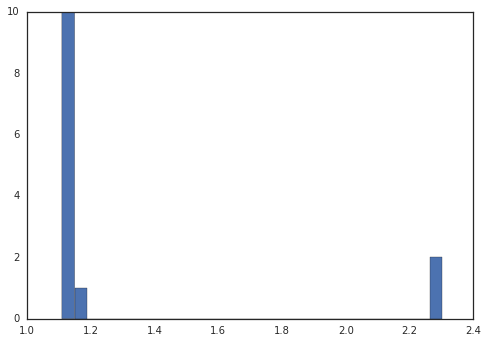

13


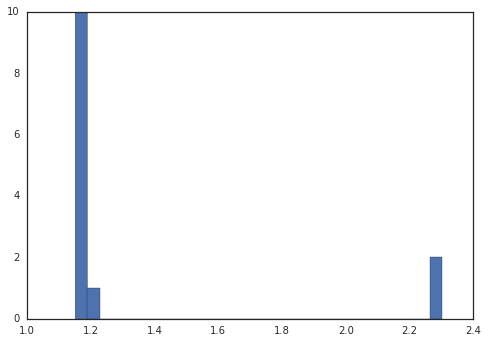

In [4]:
train_mean_per_seed = np.mean(indiv_train_losses,axis=1)
print(len(train_mean_per_seed))
plt.hist(train_mean_per_seed,bins=30)
plt.show()

test_mean_per_seed = np.mean(indiv_test_losses,axis=1)
print(len(test_mean_per_seed))
plt.hist(test_mean_per_seed,bins=30)
plt.show()

In [5]:
indiv_train_losses_log = np.log(indiv_train_losses)
train_means_log = [None] * num_train_points
train_stddevs_log = [None] * num_train_points
for i in range(num_train_points):
    train_means_log[i], train_stddevs_log[i] = norm.fit(indiv_train_losses_log[:,i])
seed_train_means_log = [None] * num_seeds
seed_train_stddevs_log = [None] * num_seeds
for i in range(num_seeds):
    seed_train_means_log[i], seed_train_stddevs_log[i] = norm.fit(indiv_train_losses_log[i])
orig_losses = np.array([indiv_test_losses[:,6558],]*num_train_points).transpose()
#print(orig_losses)
indiv_pred_infls_log = np.subtract(np.log(np.add(orig_losses, indiv_pred_infls)), np.log(orig_losses))
infl_means_log = [None] * num_train_points
infl_stddevs_log = [None] * num_train_points
for i in range(num_train_points):
    a, loc, scale = skewnorm.fit(indiv_pred_infls_log[:,i])
    infl_means_log[i] = skewnorm.mean(a, loc, scale)
    infl_stddevs_log[i] = skewnorm.std(a, loc, scale)
    if i % (num_train_points//11) == 0:
        print(i,num_train_points)

0 49000
4454 49000


KeyboardInterrupt: 

In [ ]:
plt.hist(indiv_pred_infls_log[0],bins=30)
x = np.linspace(min(indiv_pred_infls_log[0]), max(indiv_pred_infls_log[0]))
plt.plot(x, 4*norm.pdf(x, *norm.fit(indiv_pred_infls_log[0])))
plt.xlabel('Log pred infl')
plt.ylabel('Count')
plt.suptitle('Seed 0')
plt.show()

plt.scatter(infl_means_log, infl_stddevs_log, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.axes().set_aspect('equal')
plt.xlabel('Log infl mean')
plt.ylabel('Log infl stddev')
plt.suptitle('Each point is a training point')
plt.show()

plt.hist(infl_means_log,bins=50)
plt.xlabel('Log infl mean')
plt.show()

plt.hist(infl_stddevs_log,bins=50)
plt.xlabel('Log infl stddev')
plt.show()

def plot_pred_infl_distrib_log(idx):
    plt.hist(indiv_pred_infls_log[:,idx],bins=25)
    x = np.linspace(min(indiv_pred_infls_log[:,idx]), max(indiv_pred_infls_log[:,idx]))
    a, loc, scale = skewnorm.fit(indiv_pred_infls_log[:,idx])
    plt.plot(x, 0.01*skewnorm.pdf(x, a, loc, scale))
    plt.scatter(indiv_pred_infls_log[:,idx], np.zeros(num_seeds)-1,alpha=0.3)
    plt.suptitle('Train pt {}: Mean {}, Stddev {}'.format(idx, infl_means_log[idx], infl_stddevs_log[idx]))
    plt.xlabel('Log pred infl')
    plt.ylabel('Count')
    plt.show()
    plot_pred_infl_distrib(idx,fit='normal')

plt.scatter(infl_means_log, infl_means, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.suptitle('Means')
plt.xlabel('Log infl mean')
plt.ylabel('Infl mean')
plt.show()

plt.scatter(infl_stddevs_log, infl_stddevs, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.suptitle('Stddevs')
plt.xlabel('Log infl stddev')
plt.ylabel('Infl stddev')
plt.show()
    
plot_pred_infl_distrib_log(0)
plot_pred_infl_distrib_log(1173)
plot_pred_infl_distrib_log(4644)
plot_pred_infl_distrib_log(10)

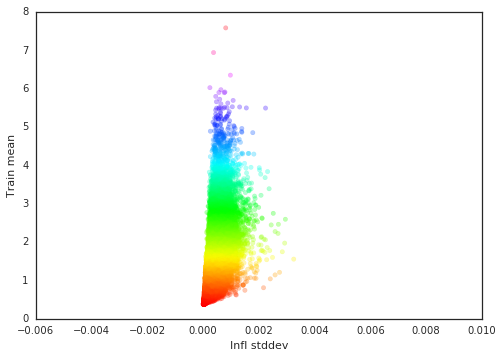

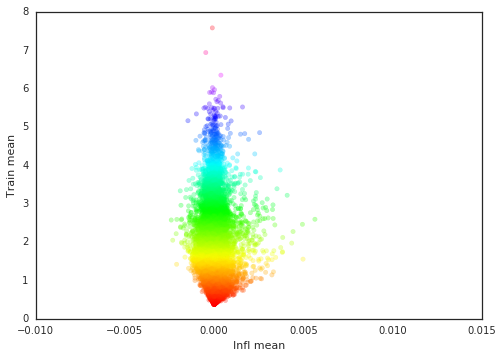

u"plt.scatter(infl_stddevs_log, train_stddevs, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))\nplt.xlabel('Log infl stddev')\nplt.ylabel('Train stddev')\nplt.show()\n\nplt.scatter(infl_means_log, train_stddevs, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))\nplt.xlabel('Log infl mean')\nplt.ylabel('Train stddev')\nplt.show()"

In [6]:
"""plt.scatter(infl_stddevs_log, train_means, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Log infl stddev')
plt.ylabel('Train mean')
plt.show()

plt.scatter(infl_means_log, train_means, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Log infl mean')
plt.ylabel('Train mean')
plt.show()"""

plt.scatter(infl_stddevs, train_means, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Infl stddev')
plt.ylabel('Train mean')
plt.show()

plt.scatter(infl_means, train_means, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Infl mean')
plt.ylabel('Train mean')
plt.show()

"""plt.scatter(infl_stddevs_log, train_stddevs, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Log infl stddev')
plt.ylabel('Train stddev')
plt.show()

plt.scatter(infl_means_log, train_stddevs, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Log infl mean')
plt.ylabel('Train stddev')
plt.show()"""

In [ ]:
plt.hist(indiv_train_losses_log[:,1173],bins=20)
plt.scatter(indiv_train_losses_log[:,1173],np.zeros(num_seeds)-1)
plt.xlabel('Log train')
plt.suptitle('Train pt 1173')
plt.show()

plt.hist(indiv_train_losses_log[:,4644],bins=20)
plt.scatter(indiv_train_losses_log[:,4644],np.zeros(num_seeds)-1)
plt.xlabel('Log train')
plt.suptitle('Train pt 4644')
plt.show()

In [ ]:
plt.hist(indiv_train_losses_log[0],bins=30)
x = np.linspace(min(indiv_train_losses_log[0]), max(indiv_train_losses_log[0]))
plt.plot(x, 1100*norm.pdf(x, *norm.fit(indiv_train_losses_log[0])))
plt.xlabel('Log of train loss')
plt.ylabel('Count')
plt.suptitle('Seed 0: Mean {}, Stddev {}'.format(seed_train_means_log[0], seed_train_stddevs_log[0]))
plt.show()

plt.scatter(seed_train_means_log, seed_train_stddevs_log, alpha=0.3)
plt.xlim(-5,2)
plt.ylim(-2,2)
plt.xlabel('Mean of log of train losses for a seed')
plt.ylabel('Stddev of log of train losses for a seed')
plt.suptitle('Each point is a seed')
plt.show()

def plot_train_loss_distrib_log(idx):
    plt.hist(indiv_train_losses_log[:,idx],bins=25)
    x = np.linspace(min(indiv_train_losses_log[:,idx]), max(indiv_train_losses_log[:,idx]))
    mean, stddev = norm.fit(indiv_train_losses_log[:,idx])
    plt.plot(x, 10*norm.pdf(x, mean, stddev))
    plt.scatter(indiv_train_losses_log[:,idx], np.zeros(num_seeds)-1,alpha=0.3)
    plt.suptitle('Train pt {}: Mean {}, Stddev {}'.format(idx, mean, stddev))
    plt.xlabel('Log of train loss')
    plt.ylabel('Count')
    plt.show()
    plot_train_loss_distrib(idx,fit='normal')

plt.scatter(train_means_log, train_stddevs_log, alpha=0.3)
plt.suptitle('Indiv log of train loss')
plt.xlabel('Mean')
plt.ylabel('Stddev')
plt.show()

plt.hist(train_means_log,bins=30)
x = np.linspace(min(train_means_log), max(train_means_log))
mean, stddev = norm.fit(train_means_log)
plt.plot(x, 1100*norm.pdf(x, mean, stddev))
plt.xlabel('Mean of log of train loss')
plt.ylabel('Count')
plt.suptitle('Each point is a training point: Mean {}, Stddev {}'.format(mean, stddev))
plt.show()

plt.hist(train_stddevs_log,bins=30)
x = np.linspace(min(train_stddevs_log), max(train_stddevs_log))
a, loc, scale = skewnorm.fit(train_stddevs_log)
plt.plot(x, 100*skewnorm.pdf(x, a, loc, scale))
plt.xlabel('Stddev of log of train loss')
plt.ylabel('Count')
mean = skewnorm.mean(a, loc, scale)
stddev = skewnorm.std(a, loc, scale)
plt.suptitle('Each point is a training point: Mean {}, Stddev {}'.format(mean, stddev))
plt.show()

plot_train_loss_distrib_log(0)
plot_train_loss_distrib_log(1173)
plot_train_loss_distrib_log(4644)
plot_train_loss_distrib_log(10)

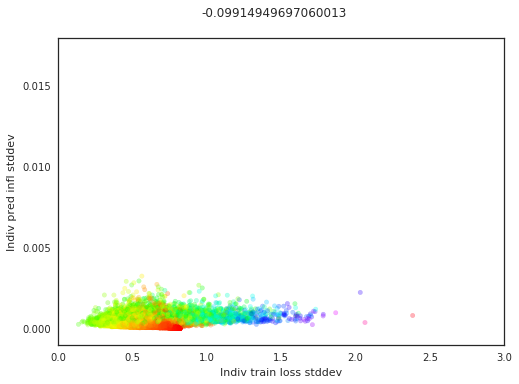

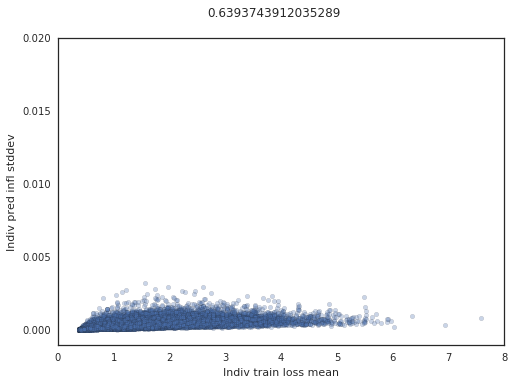

-0.14307253
-0.081171185


In [7]:
plt.suptitle(pearsonr(train_stddevs, infl_stddevs)[0])
plt.scatter(train_stddevs, infl_stddevs,alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Indiv train loss stddev')
plt.ylabel('Indiv pred infl stddev')
plt.ylim(-0.001,0.018)#06)
plt.show()

plt.suptitle(pearsonr(train_means, infl_stddevs)[0])
plt.scatter(train_means, infl_stddevs,alpha=0.3)
plt.xlabel('Indiv train loss mean')
plt.ylabel('Indiv pred infl stddev')
plt.ylim(-0.001,0.02)
plt.show()

print(pearsonr(train_means,train_stddevs)[0])
print(pearsonr(test_means,test_stddevs)[0])

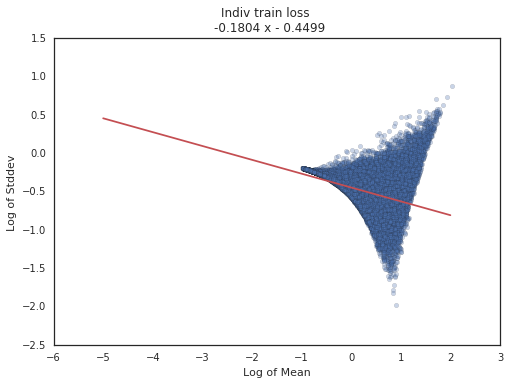

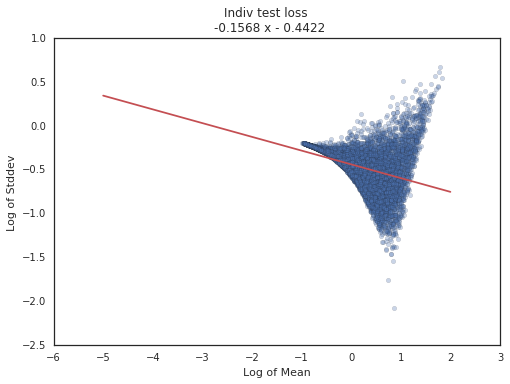

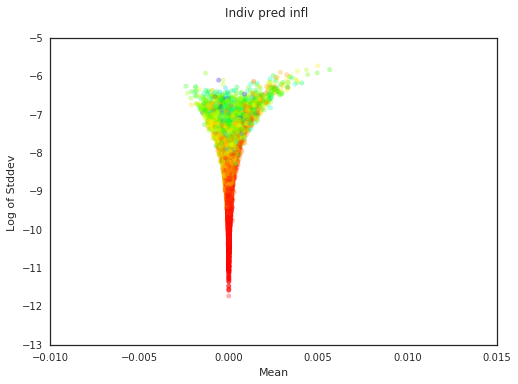

In [8]:
plt.scatter(np.log(train_means), np.log(train_stddevs),alpha=0.3)
plt.xlabel('Log of Mean')
plt.ylabel('Log of Stddev')
plt.plot(range(-5,3), np.poly1d(np.polyfit(np.log(train_means), np.log(train_stddevs), 1))(range(-5,3)),color='r')
plt.suptitle('Indiv train loss {}'.format(np.poly1d(np.polyfit(np.log(train_means), np.log(train_stddevs), 1))))
plt.show()

plt.scatter(np.log(test_means), np.log(test_stddevs),alpha=0.3)
plt.xlabel('Log of Mean')
plt.ylabel('Log of Stddev')
plt.plot(range(-5,3), np.poly1d(np.polyfit(np.log(test_means), np.log(test_stddevs), 1))(range(-5,3)),color='r')
plt.suptitle('Indiv test loss {}'.format(np.poly1d(np.polyfit(np.log(test_means), np.log(test_stddevs), 1))))
plt.show()

plt.suptitle('Indiv pred infl')
plt.scatter(infl_means, np.log(infl_stddevs),alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Mean')
plt.ylabel('Log of Stddev')
plt.show()

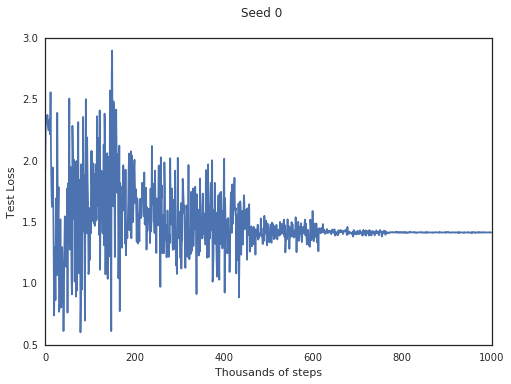

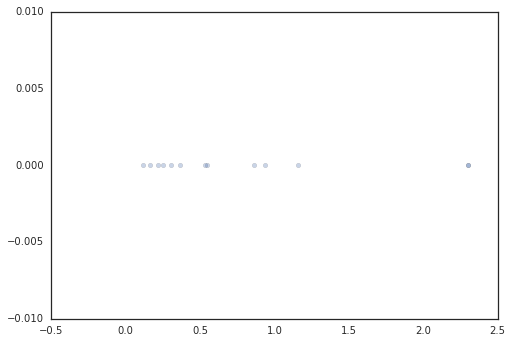

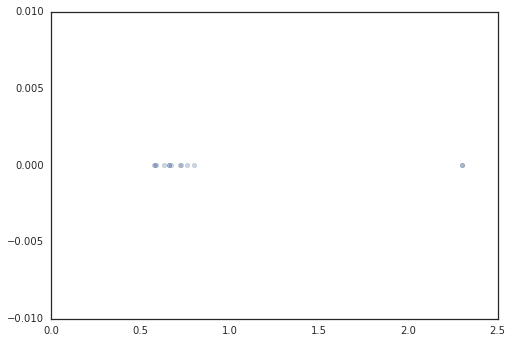

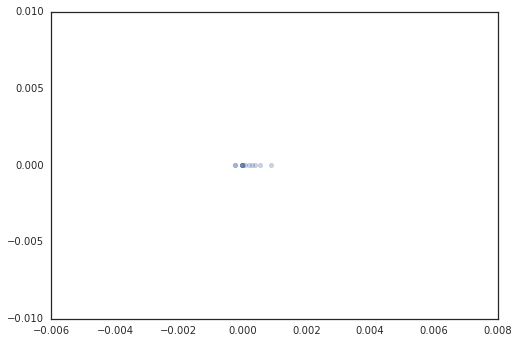

In [21]:
plt.plot(losses_over_time[0])
plt.suptitle('Seed 0')
plt.xlabel('Thousands of steps')
plt.ylabel('Test Loss')
plt.show()

plt.scatter(indiv_train_losses[:,0],np.zeros(num_seeds),alpha=0.3)
plt.show()

plt.scatter(indiv_test_losses[:,0],np.zeros(num_seeds),alpha=0.3)
plt.show()

plt.scatter(indiv_pred_infls[:,0],np.zeros(num_seeds),alpha=0.3)
plt.show()

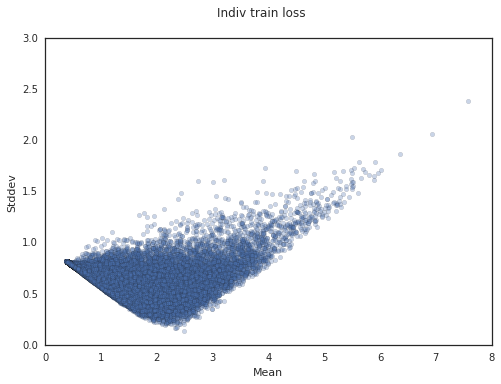

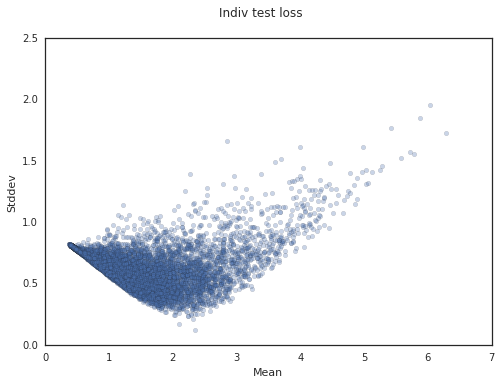

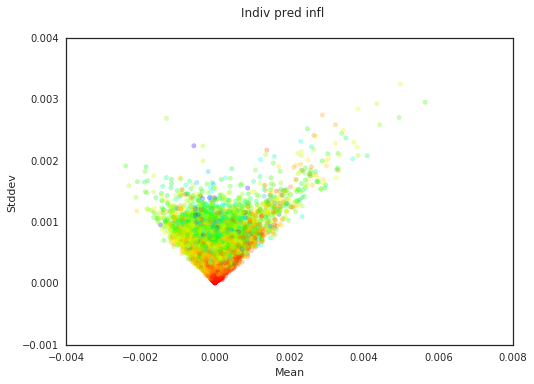

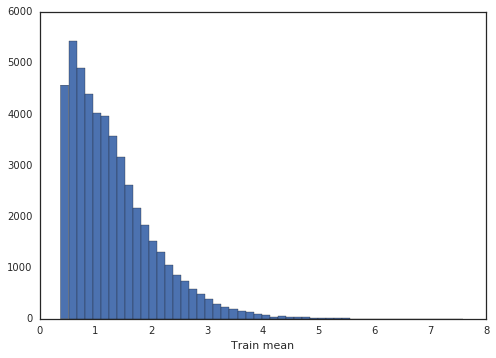

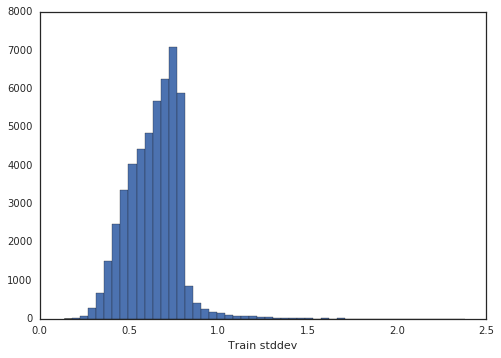

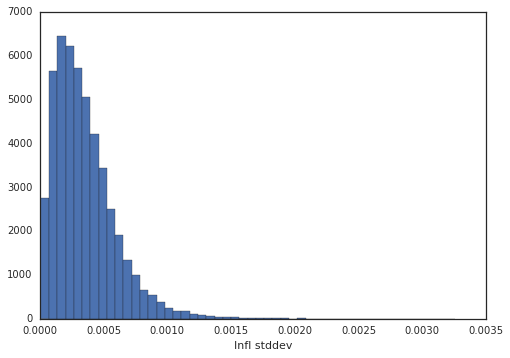

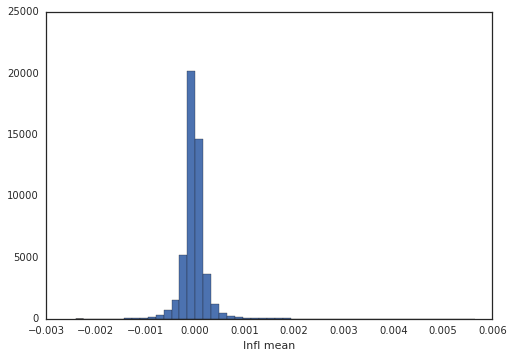

In [15]:
plt.suptitle('Indiv train loss')
plt.scatter(train_means, train_stddevs,alpha=0.3)
plt.xlabel('Mean')
plt.ylabel('Stddev')
plt.show()

plt.suptitle('Indiv test loss')
plt.scatter(test_means, test_stddevs,alpha=0.3)
plt.xlabel('Mean')
plt.ylabel('Stddev')
plt.show()

plt.suptitle('Indiv pred infl')
plt.scatter(infl_means, infl_stddevs,alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Mean')
plt.ylabel('Stddev')
plt.xlim(-0.004,0.008)
plt.ylim(-0.001,0.004)
plt.show()

plt.hist(train_means,bins=50)
plt.xlabel('Train mean')
plt.show()

plt.hist(train_stddevs,bins=50)
plt.xlabel('Train stddev')
plt.show()

plt.hist(infl_stddevs,bins=50)
plt.xlabel('Infl stddev')
plt.show()

plt.hist(infl_means,bins=50)
plt.xlabel('Infl mean')
plt.show()

In [ ]:
"""plt.suptitle('Indiv train loss skew')
plt.scatter(train_means_skew, train_stddevs_skew,alpha=0.3)
plt.xlabel('Mean')
plt.ylabel('Stddev')
plt.show()

plt.suptitle('Indiv test loss skew')
plt.scatter(test_means_skew, test_stddevs_skew,alpha=0.3)
plt.xlabel('Mean')
plt.ylabel('Stddev')
plt.show()

plt.suptitle('Indiv pred infl skew')
plt.scatter(infl_means_skew, infl_stddevs_skew,alpha=0.3)
plt.xlabel('Mean')
plt.ylabel('Stddev')
plt.show()"""

In [ ]:
"""plt.scatter(train_means_skew, train_means,alpha=0.3)
plt.xlabel('Train mean skew')
plt.ylabel('Train mean')
plt.show()

plt.scatter(test_means_skew, test_means,alpha=0.3)
plt.xlabel('Test mean skew')
plt.ylabel('Test mean')
plt.show()

plt.scatter(train_stddevs_skew, train_stddevs,alpha=0.3)
plt.xlabel('Train stddevs skew')
plt.ylabel('Train stddevs')
plt.show()

plt.scatter(test_stddevs_skew, test_stddevs,alpha=0.3)
plt.xlabel('Test stddevs skew')
plt.ylabel('Test stddevs')
plt.show()"""

In [ ]:
"""for train_pt in range(15):
    plot_pred_infl_distrib(train_pt,fit='normal')
    plot_train_loss_distrib(train_pt,fit='skew')"""

In [10]:
# point specific
for train_pt in [1173,4644]:
    plot_train_loss_distrib(train_pt,fit='normal')
    plot_pred_infl_distrib(train_pt,fit='normal')
for test_pt in [8,6558]:
    plot_test_loss_distrib(test_pt,fit='normal')

NameError: name 'plot_train_loss_distrib' is not defined

In [ ]:
"""for i in range(num_seeds):
    a, loc, scale = gamma.fit(indiv_train_losses[i])
    print(a, loc, scale)
    x = np.linspace(0,5,100)
    plt.plot(x,gamma.pdf(x, a, loc, scale)*300,zorder=1)
    plt.hist(indiv_train_losses[i],bins=500,alpha=0.2,zorder=2)
    plt.show()"""

In [ ]:
"""# seed specific
for i in range(num_seeds):
    if seeds[i] not in range(300):#range(44):
        plot_all_distribs_for_seed(i, thresholding=False)
        #plot_all_distribs_for_seed(0, thresholding=False)"""

In [ ]:
# overall
#plot_tracked_loss_for_all_seeds()
#plot_indiv_train_losses_for_all_seeds()
#plot_indiv_test_losses_for_all_seeds()
#plot_indiv_pred_infls_for_all_seeds()